In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random

### Method Of Moments

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

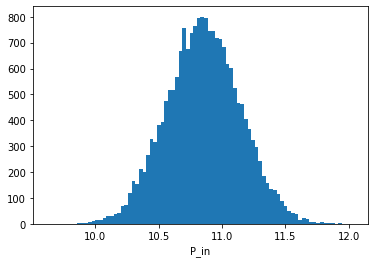

In [4]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

In [5]:
def get_moments(data):
    moments={}
    moments['mean'] = np.mean(data)
    moments['variance'] = np.var(data)
    moments['skew'] = scipy.stats.skew(data)
    moments['kurtosis'] = scipy.stats.kurtosis(data)
    return moments

In [6]:
def uniform_from_moments(data):
    return min(simulation), max(simulation) - min(simulation)
    

In [7]:
# Reference Wackerly [Book Stat Methods]
def beta_from_moments(data):
    # Scale data
    beta_data = (data - min(data)) / (max(data) - min(data))
    
    # Moments of data
    moments = get_moments(beta_data)
    
    # Sample Measures
    Y_bar = moments['mean']
    s2 = moments['variance']
    
    # Distribution Parameters
    alpha = Y_bar * (Y_bar*(1 - Y_bar)/s2 - 1)
    beta = alpha * (1 - Y_bar) / Y_bar
    loc = min(data)
    scale = max(data) - min(data)
    
    return alpha, beta, loc, scale

In [8]:
def gamma_from_moments(data):
    # Scale data
    gamma_data = data - min(data)
    
    # Moments of data
    moments = get_moments(gamma_data)
    
    # Sample Measures
    Y_bar = moments['mean'] 
    n = len(data)
    
    # Distribution Parameters
    alpha = Y_bar**2 / moments['variance']
    beta = Y_bar / alpha
    loc = min(data)
    
    return alpha, loc, beta

In [9]:
def norm_from_moments(data):
    # Moments of data
    moments = get_moments(data)
    
    # Distribution Parameters
    mu = moments['mean']
    sigma = moments['variance']**0.5
    
    return mu, sigma

In [10]:
def lognorm_from_moments(data):
    #Scale Data
    lognorm_data = data - min(data)

    # Moments of data
    moments = get_moments(lognorm_data)

    # Sample Measures
    Y_bar = moments['mean']
    s2 = moments['variance']

    # Distribution parameters
    mu = math.log(Y_bar) - 0.5*math.log(s2/Y_bar + 1)
    sigma2 = math.log(s2/Y_bar + 1)
    
    return sigma2**0.5, min(data), math.exp(mu)

In [11]:
moments = get_moments(simulation)

In [12]:
params_gamma = gamma_from_moments(simulation)
simulation.sort()

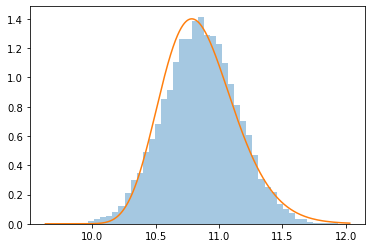

In [13]:
import seaborn as sns
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))

In [14]:
params_beta = beta_from_moments(simulation)
params_beta

(8.112639018532569, 7.802679803484241, 9.629764772420614, 2.4015414814156433)

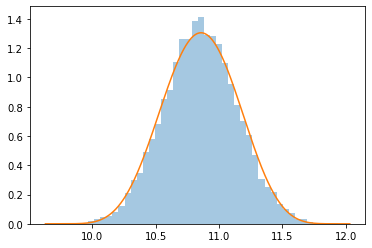

In [15]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))

In [16]:
params_normal = norm_from_moments(simulation)
params_normal

(10.853921155628283, 0.2919023720919819)

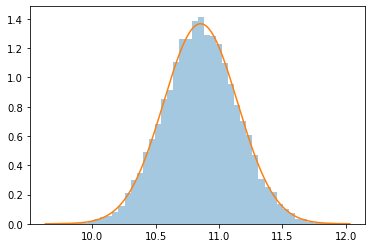

In [17]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))